# <center> Logistic Regression &amp; Evaluation Metrics for Classifiers</center>
<center>Shan-Hung Wu &amp; DataLab<br/>Fall 2016</center>

In [2]:
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

In this lab, we will guide you through the practice of Logistic Regression. Despite its name, Logistic Regression is a probabilistic model for classification, not regression. In addition to the "accuracy" metric that we have been using for evaluating the performance of a classifier, we will also introduce some other common evaluation metrics.


## Logistic Regression 

Logistic Regression is one of the most widely used classification models in industry. As discussed in the lecture, Logistic Regression predicts the label $\hat{y}$ of a given point $\boldsymbol{x}$ by  

$$\hat{y}=\arg\max_{y}\mathrm{P}(y\,|\,\boldsymbol{x};\boldsymbol{w})$$

and the condition probability is defined as

$$\mathrm{P}(y\,|\,\boldsymbol{x};\boldsymbol{w})=\sigma(\boldsymbol{w}^{\top}\boldsymbol{x})^{y'}[1-\sigma(\boldsymbol{w}^{\top}\boldsymbol{x})]^{(1-y')},$$

where $y'=\frac{y+1}{2}$. Let's first plot the logistic function $\sigma$ over $z=\boldsymbol{w}^{\top}\boldsymbol{x}$

$$\sigma\left(z\right)=\frac{\exp(z)}{\exp(z)+1}=\frac{1}{1+\exp(-z)}$$

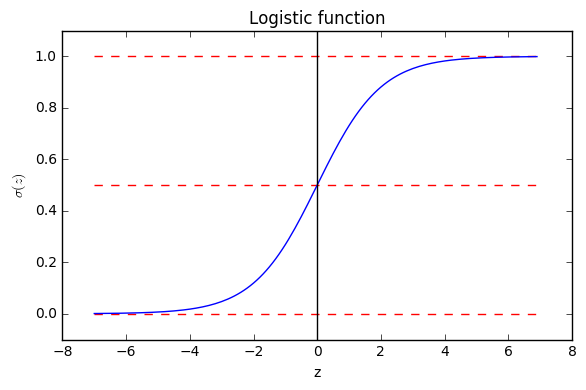

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma = logistic(z)

plt.plot(z, sigma)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.title('Logistic function')
plt.hlines(y=1.0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0.5, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.hlines(y=0, xmin=-7, xmax=7, color='red', linewidth = 1, linestyle = '--')
plt.tight_layout()
plt.savefig('./output/fig-logistic.png', dpi=300)
plt.show()

We can see that $\sigma(z)$ approaches $1$ when $(z \rightarrow \infty)$, since $e^{-z}$ becomes very small for large values of $z$. Similarly, $\sigma(z)$ goes downward to $0$ for $ z \rightarrow -\infty$ as the result of an increasingly large denominator. The logistic function takes real number values as input and transforms them to values in the range $[0, 1]$ with an intercept at $\sigma(z) = 0.5$.


To learn the weights $\boldsymbol{w}$ from the training set $\mathbb{X}$, we can use the ML estimation:

$$\arg\max_{\boldsymbol{w}}\log\mathrm{P}(\mathbb{X}\,|\,\boldsymbol{w}).$$

This problem can be solved by the gradient descent algorithm with the following update rule:

$$\boldsymbol{w}^{(t+1)}=\boldsymbol{w}^{(t)}-\eta\nabla_{\boldsymbol{w}}\log\mathrm{P}(\mathbb{X}\,|\,\boldsymbol{w}^{(t)}),$$

where

$$\nabla_{\boldsymbol{w}}\log\mathrm{P}(\mathbb{X}\,|\,\boldsymbol{w}^{(t)})=\sum_{t=1}^{N}[y'^{(i)}-\sigma(\boldsymbol{w}^{(t)\top}\boldsymbol{x}^{(i)})]\boldsymbol{x}^{(i)}.$$

Once solving $\boldsymbol{w}$, we can then make predictions by

$$\hat{y}=\arg\max_{y}\mathrm{P}(y\,|\,\boldsymbol{x};\boldsymbol{w})=\arg\max_{y}\{\sigma(\boldsymbol{w}^{\top}\boldsymbol{x}),1-\sigma(\boldsymbol{w}^{\top}\boldsymbol{x})\}=\mathrm{sign}(\boldsymbol{w}^{\top}\boldsymbol{x}).$$

Logistic Regression is very easy to implement but performs well on linearly separable classes (or classes close to linearly separable). Similar to the Perceptron and Adaline, the Logistic Regression model is also a linear model for binary classification. We can relate the Logistic Regression to our previous Adaline implementation. In Adaline, we used the identity function as the activation function. In Logistic Regression, this activation function simply becomes the logistic function as illustrated blow:

<img src="fig-logistic-regression.png" style="width: 600px;"/>

#### Predicting Class-Membership Probability

One benefit of using Logistic Regression is that it is able output the **class-membership probability** (i.e., probability of a class to which a point $\boldsymbol{x}$ belongs) via $\sigma(\boldsymbol{w}^{\top}\boldsymbol{x})$ and $1-\sigma(\boldsymbol{w}^{\top}\boldsymbol{x})$. 

In fact, there are many applications where we are not only interested in predicting class labels, but also in estimating the class-membership probability. For example, in weather forecasting, we are interested not only if it will rain tomorrow but also the chance of raining. Similarly, when diagnosing disease we usually care about the chance that a patient has a particular disease given certain symptoms. This is why Logistic Regression enjoys wide popularity in the field of medicine.

#### Training a Logistic Regression Model with Scikit-learn

Scikit-learn implements a highly optimized version of logistic regression that also supports multiclass classification off-the-shelf. Let's use it the make predictions on the standardized Iris training dataset.

NOTE: Logistic Regression, like many other binary classification models, can be easily extended to the multiclass classification via the [One-vs-All](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest) or other similar techniques.

In [6]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
#iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

# for simplicity, consider only two features and two classes

X = df[['Petal length', 'Petal width']].values[50:150,]
y, y_label = pd.factorize(df['Class label'].values[50:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# Standarize X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Training data points: 80
#Testing data points: 20
Class labels: [0 1] (mapped from ['Iris-versicolor' 'Iris-virginica'])


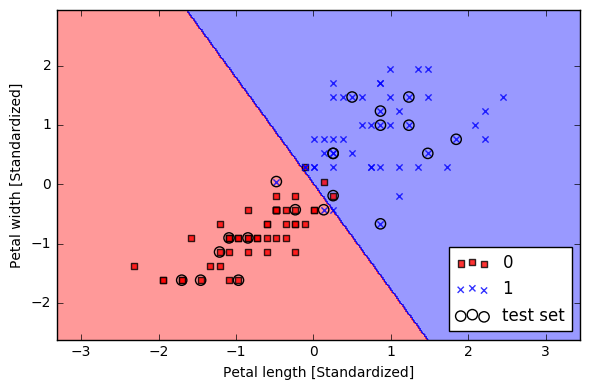

In [8]:
from sklearn.linear_model import LogisticRegression

##the training part
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

# plot decision regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(y_train.size, 
                                                    y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-boundray-2.png', dpi=300)
plt.show()

The `Logistic Regression` class can predict the class-membership probability via the `predict_proba()` method. For example, we can predict the probabilities of the first testing point:

In [10]:
test_idx = 1
print('Correct label: %s\n' % y_label[y_test[test_idx]])

prob = lr.predict_proba(X_test_std[test_idx, :].reshape(1, -1))

print('Prob for class %s: %.2f' % (y_label[0], prob[:, 0]))
print('Prob for class %s: %.2f' % (y_label[1], prob[:, 1]))

Correct label: Iris-virginica

Prob for class Iris-versicolor: 0.01
Prob for class Iris-virginica: 0.99


The `prob` array tells us that the model predicts a 94% chance that the sample belongs to the Iris-Virginica class, and a 6% chance that the sample is a Iris-Versicolor flower.

#### Regularization

One way the regularize a logistic regression classifier is to add a **weight decay** term in the objective (or cost function), as in Ridge regression:

$$\arg\max_{\boldsymbol{w}}\log\mathrm{P}(\mathbb{X}\,|\,\boldsymbol{w})-\frac{\alpha}{2}\Vert\boldsymbol{w}\Vert^2,$$

where $\alpha > 0$ is a hyperparameter that controls the trade-off between maximizing the log likelihood and minimizing the weight. Note that the `Logistic Regression` class implemented in the Scikit-learn uses the hyperparameter $C=1/\alpha$ due to convention.

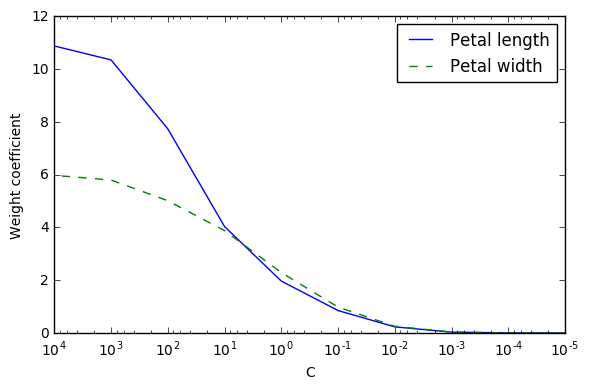

In [12]:
weights, params = [], []
##c = 1 / alpha
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    # get the coefficients of w
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1],
         label='Petal width', linestyle='--')
plt.xlim(10**4, 10**-5)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Weight coefficient')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-c.png', dpi=300)
plt.show()

## Evaluation Metrics for Binary Classifiers

So far, we evaluate the performance of a classifier using the **accuracy** metric. Although accuracy is a general and common metric, there are several other evaluation metrics that allow us to quantify the performance of a model from different aspects.

#### Confusion Matrix

Before we get into the details of different evaluation metrics, let's print the so-called **confusion matrix**, a square matrix that reports the counts of the true positive, true negative, false positive, and false negative predictions of a classifier, as shown below:

<img src="fig-confusion.png" style="width: 400px;"/>

The confusion matrix of our logistic regressor over the Iris dataset is shown as follows:

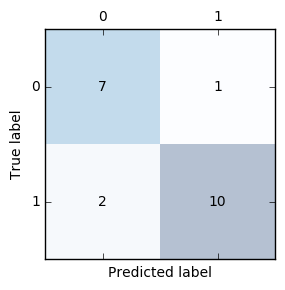

In [14]:
##on confusion matrix, true means correctly predicted
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-2.png', dpi=300)
plt.show()

The meaning of each entry in the above confusion matrix is straightforward. For example, the cell at $(1,0)$ means that $2$ positive testing points are misclassified as negative. Confusion matrix helps us know not only **how many** errors but **how** they are wrong. Correct predictions counts into the diagonal entries and a good performing classifier should have a confusion matrix close to the identity matrix.

The **error rate (ERR)** and **accuracy (ACC)** we have been using can be defined as follows:

$$ERR = \frac{FP+FN}{P+N},\enspace\text{ (lower better)}$$

$$ACC = \frac{TP+TN}{P+N} = 1-ERR.\enspace\text{ (higher better)}$$


#### True and False Positive Rate

The **true positive rate (TPR)** and **false positive rate (FPR)** are defined as:

$$FPR = \frac{FP}{N},\enspace\text{ (lower better)}$$

$$TPR = \frac{TP}{P}.\enspace\text{ (higher better)}$$

TPR and FPR are metrics particularly useful for tasks with **imbalanced classes**. For example, if we have 10% positive and 90% negative examples in the training set, then a dummy classifier that always give negative predictions will be able to achieve 90% accuracy. The accuracy metric is misleading in this case. On the other hand, by checking the TPR which equals to 0%, we can know that the dummy classifier is not performing well.


#### Precision, Recall, and $F_1$-Score

The **Precision (PRE)** and **recall (REC)** metrics are defines as:

$$PRE = \frac{TP}{P'},\enspace\text{ (higher better)}$$

$$REC = \frac{TP}{P} = TPR.\enspace\text{ (higher better)}$$

Basically, PRE means "how many points predicted as positive are indeed positive;" while REC refers to "how many positive points in the ground truth are successfully identified as positive." PRE and REC are useful metric if we care specifically about the performance of positive predictions.

In practice, we may combine PRE and REC into a single score called the **$F_1$-score**:

$$F_1 = 2\frac{(PRE * REC)}{PRE+REC},\enspace\text{ (higher better)}$$

which reaches its best value at $1$ and worst at $0$.

## Evaluation Metrics for Soft Classifiers

Many classifiers, such as Adaline and Logistic Regression, can make "soft" predictions (i.e., real values instead of the "hard" 1 or -1). We may "harden" the soft predictions by defining a **decision threshold $\theta$**. For example, suppose a classifier makes soft predictions in range $[-1,1]$ that are sorted as follows:

<img src="fig-roc-threshold.png" style="width: 120px;"/>

We can define a threshold $\theta=0.8$ such that points with scores larger/smaller than $0.8$ become positive/negative finally. It is clear that the performance of the classifier varies as we have different threshold values.

#### Receiver Operating Characteristic (ROC) Curve

The **receiver operator characteristic (ROC)** curve measures the performance of a classifier at **all** possible thresholds. We can draw an ROC curve by following the steps:

1. Rank the soft predictions from highest to lowest;
2. For each indexing threshold $\theta$ that makes the first $\theta$ points positive and the rest negative, $\theta=1,\cdots,\vert\mathbb{X}\vert$, calculate the $TPR^{(\theta)}$ and $FPR^{(\theta)}$;
3. Draw points $(TPR^{(\theta)},FPR^{(\theta)})$ in a 2-D plot and connect the points to get an ROC curve.

Let's plot the ROC curve of our logistic regressor:

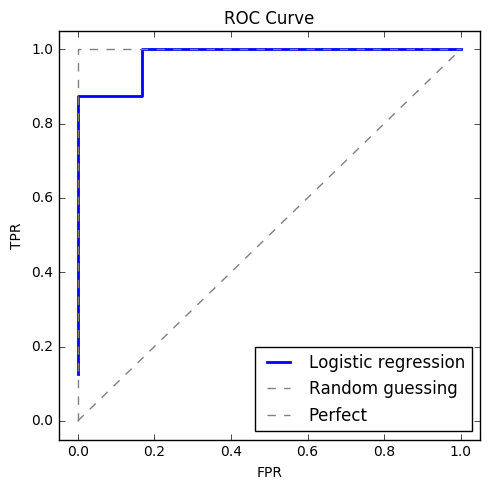

In [16]:
from sklearn.metrics import roc_curve
from scipy import interp
from cycler import cycler

lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

fig = plt.figure(figsize=(5, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

probas = lr.predict_proba(X_test_std)

#threshold would be chosen automatically
fpr, tpr, thresholds = roc_curve(y_test,
                                 probas[:, 0],
                                 pos_label=0)
plt.plot(fpr, tpr, lw=2,
         label='Logistic regression')
    
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color='gray',
         label='Random guessing')

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle='--',
         color='gray',
         label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('./output/fig-roc-lg.png', dpi=300)
plt.show()

#### How does the ROC curve of a "good" classifier look like? 

The ROC curve of a perfect classifier would fall into the top-left corner of the graph with a true positive rate of 1 and a false positive rate of 0; while the diagonal of an ROC graph can be interpreted as random guessing. Any useful classifier should have an ROC curve falling between these two curves.

#### Model Comparison

ROC curves are useful for comparing the performance of different classifiers over the same dataset. For example, suppose we have three classifiers $A$, $B$, and $C$ and their respective ROC curves, as shown below:

<img src="fig-roc-compare.png" style="width: 250px;"/>

It is clear that the classifiers $B$ and $C$ are better than $A$. But how about $B$ and $C$? This can also be answered by ROC curves:

- If we tolerate no more than 10% FPR, we should pick $B$ at an indexing threshold $\theta=0.15\vert\mathbb{X}\vert$ to get 60% TPR;
- If we tolerate 40% FPR, then pick $C$ at $\theta=0.4\vert\mathbb{X}\vert$, which gives 90% TPR.

#### Area Under the Curve (AUC)

We can reduce an ROC curve to a single value by calculating the **area under the curve (AUC)**. A perfect classifier has $AUC=1.0$, and random guessing results in $AUC=0.5$. It can be shown that AUC is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. [Homework]

Let's compute the AUC of our logistic regressor:

In [53]:
from sklearn.metrics import auc

print('AUC: %.2f' % auc(fpr, tpr))

AUC: 0.98


That's a pretty high score!

## Evaluation Metrics for Multiclass Classification


In multiclass classification problem, we can extend the above metrics via the **one-vs-all** technique, where we treat one class as "positive" and the rests as "negative" and compute a score for the class. If there are $K$ classes, then we compute $K$ scores, one for each class.  However, if we just want to have a single final score, we need to decide how to combine these scores.

Scikit-learn implements the **macro** and **micro averaging** methods. For example, the micro-average of $K$ precision scores is calculated as follows:

$$PRE_{micro} = \frac{TP^{(1)} + \cdots + TP^{(K)}}{P'^{(1)} + \cdots + P'^{(K)}};$$

while the macro-average is simply the average of individual PRE's:

$$PRE_{macro} = \frac{PRE^{(1)} + \cdots + PRE^{(K)}}{K}$$

Micro-averaging is useful if we want to weight each data point or prediction equally, whereas macro-averaging weights all classes equally. Macro-average is the default in Scikit-learn.

Let's train a multiclass logistic regressor and see how it performs:

#Training data points: 16 + 33 + 31 = 80
#Testing data points: 4 + 17 + 19 = 40
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'])


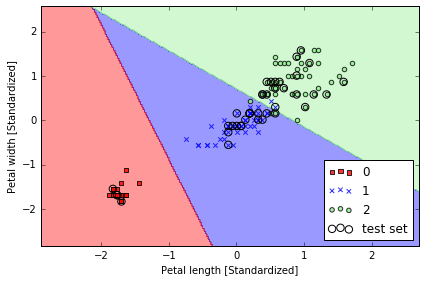

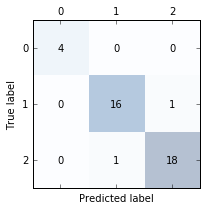

[Precision]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[Recall]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96

[F1-score]
Individual: 1.00, 0.94, 0.95
Micro: 0.95
Macro: 0.96


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# prepare datasets

X = df[['Petal length', 'Petal width']].values[30:150,]
y, y_label = pd.factorize(df['Class label'].values[30:150])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

print('#Training data points: %d + %d + %d = %d' % ((y_train == 0).sum(), 
                                                    (y_train == 1).sum(), 
                                                    (y_train == 2).sum(), 
                                                     y_train.size))
print('#Testing data points: %d + %d + %d = %d' % ((y_test == 0).sum(), 
                                                    (y_test == 1).sum(), 
                                                    (y_test == 2).sum(), 
                                                     y_test.size))
print('Class labels: %s (mapped from %s)' % (np.unique(y), np.unique(y_label)))

# standarize X

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# training & testing

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

# plot decision regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(y_train.size, 
                                                    y_train.size + y_test.size))
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-boundray-3.png', dpi=300)
plt.show()

# plot confusion matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('./output/fig-logistic-regression-confusion-3.png', dpi=300)
plt.show()

# metrics

print('[Precision]')
p = precision_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (p[0], p[1], p[2]))
p = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % p)
p = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % p)

print('\n[Recall]')
r = recall_score(y_true=y_test, y_pred=y_pred,average=None)
print('Individual: %.2f, %.2f, %.2f' % (r[0], r[1], r[2]))
r = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % r)
r = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % r)

print('\n[F1-score]')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print('Individual: %.2f, %.2f, %.2f' % (f[0], f[1], f[2]))
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print('Micro: %.2f' % f)
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print('Macro: %.2f' % f)

##note : 
## basically, micro = acuarcy

We can see that the micro average reports more conservative scores. This is because that it takes into account the class size. In our testing set, the first class is smaller than the others. So, its score (1.00) contributes less to the final score. 